In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression as Reg
from sklearn.metrics import mean_squared_error, r2_score


In [5]:
df = pd.read_csv('D:/BURO/Internship/The SPARK Foundation/1. Linear Regression/student_scores - student_scores.csv')

In [6]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [7]:
df.shape

(25, 2)

Thus, there are 25 observations with respect to hours and scores.

In [8]:
df.dtypes

Hours     float64
Scores      int64
dtype: object

In [9]:
#Checking for missing values:

df[df.isnull().any(axis=1)].head()

,Hours,Scores


In [10]:
df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


# Checking for Outliers:

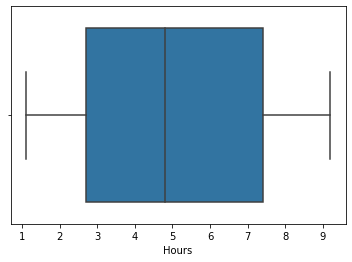

In [11]:
#Detecting outliers:

sns.boxplot(x=df['Hours'])


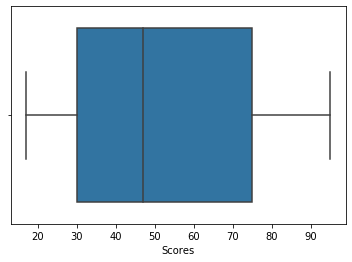

In [12]:

sns.boxplot(x=df['Scores'])


Thus, our dataset is free from outliers.

# Preparing for ML model:

In [13]:
#Separating the regressors and the regressands:

X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [14]:
# Splitting the dataset into the Training set and Test set:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [15]:
print('How many samples do we have in our test and train datasets?')
print('X_train: ', np.shape(X_train))
print('y_train: ', np.shape(y_train))
print('X_test: ', np.shape(X_test))
print('y_test: ', np.shape(y_test))

How many samples do we have in our test and train datasets?
X_train:  (20, 1)
y_train:  (20,)
X_test:  (5, 1)
y_test:  (5,)


In [16]:
# Training the Linear Regression model on the whole dataset:

from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [17]:
# My model's parameters:
print('Model intercept: ', reg.intercept_)
print('Model coefficients: ', reg.coef_)

Model intercept:  2.018160041434683
Model coefficients:  [9.91065648]


## Thus, the model is of the form:
    
    Score = 2.018 + 9.91Hours

# Predictions using the model:

In [18]:
#Predicting Weights from Train Dataset:

y_head = reg.predict(X_train)

In [19]:
#Analysing the Success of the Model from Train Dataset and Predictions:

r2_score(y_train, y_head)

0.9515510725211552

In [20]:
#Using Trained Model and Test Dataset to Estimate Weights:

y_pred = reg.predict(X_test)

In [21]:
#Analysing the Success of the Trained Model from Test Dataset and Predictions:

print(r2_score(y_test, y_pred))

0.9454906892105356


# Comparing Real and Predicted Heights:

In [22]:
y_pred1 = pd.DataFrame(y_pred, columns=['Estimated Height'])
y_pred1.head()

,Estimated Height
0,16.884145
1,33.732261
2,75.357018
3,26.794801
4,60.491033


In [23]:
y_test1 = pd.DataFrame(y_test)
y_test1 = y_test1.reset_index(drop=True)
y_test1.head()
y_test1.columns=['Actual Height']
y_test1

,Actual Height
0,20
1,27
2,69
3,30
4,62


In [24]:
ynew = pd.concat([y_test1, y_pred1], axis=1)
ynew

,Actual Height,Estimated Height
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


## Predicting score for hours = 9.25

In [25]:
X_pred=np.array([9.25]).reshape(-1,1)
reg.fit(X, y)
y_pred=reg.predict(X_pred)


print("Number of hours:",9.25)
print("predicted score:",y_pred[0])

Number of hours: 9.25
predicted score: 92.90985477015731


# Model Accuracy:

In [30]:
#R2 Score:

print('R2 score of training set: ', r2_score(y_train, y_head))
print('MAPE score of training set: ', mean_squared_error(y_train, y_head))



R2 score of training set:  0.9515510725211552
MAPE score of training set:  30.89818237731452
